In [25]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
from sklearn import datasets

In [26]:
# gradient descent function
def gradient_descent(g, step, max_its, w, p):    
    # compute gradient
    gradient = grad(g)
    # gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd': # diminishing step
            alpha = 1/(k+1)
        else: # constant step
            alpha = step
        w = w - alpha*grad_eval_norm
# record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

(0.0, 2.0)

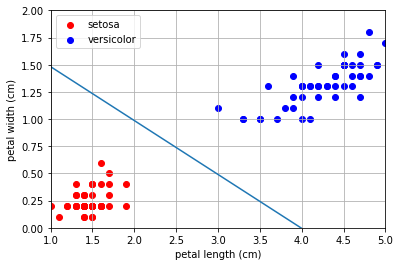

In [38]:

#from sklearn import linear_model


def model(x_p,w):
    # compute linear comb and return
    a = w[0] + np.dot(x_p,w[1:])
    return a
# define sigmoid
def sigmoid(t):
    return 1/(1+np.exp(-t))

# cross-entropy function
def cross_entropy(w,x,y):
    # compute sigmoid of model
    a = sigmoid(model(x,w))    
    # compute cost of label 0 points
    ind = np.argwhere(y==0)[:,0]
    cost = -np.sum(np.log(1-a[ind,:]))
    # add cost of label 0 points
    ind = np.argwhere(y==1)[:,0]
    cost -= np.sum(np.log(a[ind,:]))
    # compute cross-entropy
    return cost/y.size





iris = datasets.load_iris()
# get labels (for 2 classes only) and features
y = iris.target
x1 = iris.data[y<2,2]
x2 = iris.data[y<2,3]
y = y[y<2]
x=np.array([x1,x2])
x=x.T

plt.figure(1)
# scatter plot
colors=('r','b')
for target in range(2):
    plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


def g(t):
    g = cross_entropy(t,x,y)
    return g

iter=100
w = np.array([[1.], [1.], [1.]])
a, b = gradient_descent(g,0.1,iter,w,0)

a = np.array((a))
a = a.reshape(iter+1,3)


# plot boundary
x1p=np.linspace(1,5,20)
x2p=-(a[iter][0]+a[iter][1]*x1p)/a[iter][2]
plt.plot(x1p,x2p)
plt.xlim(1, 5)
plt.ylim(0, 2)

(0.0, 2.0)

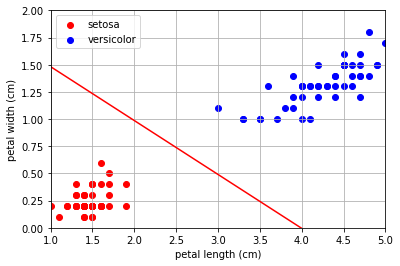

In [39]:
def soft_max_cost(w,x,y):
    # map y from 0,1 to -1,1
    y_hat = 2*y-1
    y_hat = y_hat.reshape(y.size,1)
    # compute softmax cost function
    cost = np.sum(np.log(1+np.exp(-np.multiply(y_hat,model(x,w)))))
    return cost/y.size

# scatter plot
plt.figure(2)
colors=('r','b')
for target in range(2):
    plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


def g2(t):
    g2 = soft_max_cost(t,x,y)
    return g2

iter=100
w = np.array([[1.], [1.], [1.]])
a2, b2 = gradient_descent(g2,0.1,iter,w,0)

a2 = np.array((a2))
a2 = a2.reshape(iter+1,3)


# plot boundary
x1p=np.linspace(1,5,20)
x2p=-(a2[iter][0]+a2[iter][1]*x1p)/a2[iter][2]
plt.plot(x1p,x2p,'r')
plt.xlim(1, 5)
plt.ylim(0, 2)

(0.0, 2.0)

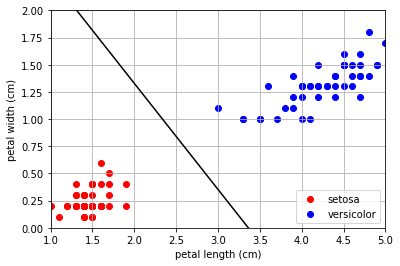

In [40]:
def SVM_cost(w,x,y):
    # map y from 0,1 to -1,1
    lam = 0.3
    y_hat = 2*y-1
    y_hat = y_hat.reshape(y.size,1)
    # compute softmax cost function
    cost = np.sum(np.log(1+np.exp(1-np.multiply(y_hat,model(x,w)))))+lam*np.linalg.norm(w[1:])**2
    return cost/y.size

# scatter plot
colors=('r','b')
plt.figure(3)
for target in range(2):
    plt.scatter(x1[y==target],x2[y==target],c=colors[target])
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])


def g3(t):
    g3 = SVM_cost(t,x,y)
    return g3

iter=100
w3 = np.array([[1.], [1.], [1.]])
a3, b3 = gradient_descent(g3,0.1,iter,w3,0)

a3 = np.array((a3))
a3 = a3.reshape(iter+1,3)


# plot boundary
x1p=np.linspace(1,5,20)
x2p2=-(a3[iter][0]+a3[iter][1]*x1p)/a3[iter][2]
plt.plot(x1p,x2p2,'k')
plt.xlim(1, 5)
plt.ylim(0, 2)